### Importing modules 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from functools import reduce
plt.style.use('ggplot')

# 1. Data exploration

In [75]:
#Reading CSV file
arq = "FC_Mixer_MO.csv"
df = pd.read_csv(arq, sep=',')

In [76]:
#Start the Exploration Data
df.head(5)

,site,division,category,line,model_name,recipe_group,uniqueid,product_code,model_complete,char_name,char_time,char_value
0,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-11 10:19:25,3560.0
1,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-11 20:49:30,300.0
2,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-12 04:28:05,190.0
3,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-12 07:41:10,140.0
4,Amera,HomeEssentials,FabricConditioner,MX-FB-03,MX-FB-Visc_pred_v0.14,UNDEFINED,44168,NaN,COMPLETE,non_value_operating_time,2023-02-12 15:19:00,640.0


In [77]:
#Getting all the columns
df.columns

Index(['site', 'division', 'category', 'line', 'model_name', 'recipe_group',
       'uniqueid', 'product_code', 'model_complete', 'char_name', 'char_time',
       'char_value'],
      dtype='object')

In [78]:
#Getting all the rows and columns amount
df.shape 

(3646, 12)

In [79]:
#Getting the types of the columns
df.dtypes

site               object
division           object
category           object
line               object
model_name         object
recipe_group       object
uniqueid            int64
product_code      float64
model_complete     object
char_name          object
char_time          object
char_value        float64
dtype: object

In [80]:
#Getting the describe of the columns that are float
df.describe()

,uniqueid,product_code,char_value
count,3646.000000,0.0,3646.000000
mean,45142.328579,NaN,12033.188652
std,1026.736180,NaN,20594.765449
min,44168.000000,NaN,-17615.346000
25%,44247.000000,NaN,3.234286
50%,44724.000000,NaN,920.000000
75%,45913.250000,NaN,13347.500000
max,47268.000000,NaN,229025.000000


In [81]:
#Getting info to know how much null variable are in the dataset
df.info()
# print(df.shape)
# print(df['product_code'].isna().count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site            3646 non-null   object 
 1   division        3646 non-null   object 
 2   category        3646 non-null   object 
 3   line            3646 non-null   object 
 4   model_name      3646 non-null   object 
 5   recipe_group    3646 non-null   object 
 6   uniqueid        3646 non-null   int64  
 7   product_code    0 non-null      float64
 8   model_complete  3646 non-null   object 
 9   char_name       3646 non-null   object 
 10  char_time       3646 non-null   object 
 11  char_value      3646 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 341.9+ KB


In [82]:
#Getting the unique values of the batches
print(df['uniqueid'].unique())
print('Amount: ' + str(len(df['uniqueid'].unique())))

[44168 44169 44176 44199 44221 44226 44245 44247 44258 44259 44268 44289
 44293 44307 44333 44339 44348 44453 44455 44491 44498 44502 44513 44671
 44677 44702 44718 44724 44752 44783 44794 44798 44800 44826 44900 44910
 44919 44930 44938 44944 44972 44994 45007 45052 45064 45105 45144 45176
 45185 45195 45212 45222 45248 45267 45275 45283 45302 45318 45328 45367
 45379 45405 45415 45428 45481 45495 45529 45540 45541 45598 45609 45614
 45640 45652 45667 45682 45683 45719 45743 45745 45753 45788 45805 45812
 45815 45827 45838 45852 45855 45863 45867 45877 45880 45892 45911 45914
 45920 45921 45935 45951 45958 45971 46034 46049 46053 46057 46118 46138
 46182 46198 46243 46248 46264 46299 46347 46350 46359 46368 46420 46434
 46490 46568 46619 46668 46680 46685 46690 46702 46720 46731 46742 46766
 46791 46801 46816 46822 46828 46842 46871 46895 46898 46956 46977 46986
 47002 47014 47020 47030 47036 47057 47070 47075 47086 47137 47147 47151
 47156 47169 47184 47196 47204 47238 47253 47268]
A

In [83]:
#Getting the production phases and putting them in a list
lista_fases = df['char_name'].unique()
print(df['char_name'].unique())
print('Amount: ' + str(len(df['char_name'].unique())))

['non_value_operating_time' 'phase_1.Inicio.duration'
 'phase_2.Medicion.duration' 'phase_3.Recirculacion.duration'
 'phase_3.Recirculacion.Peso_avg' 'phase_3.Recirculacion.Densidad_max'
 'phase_3.Recirculacion.Presion_avg' 'phase_3.Recirculacion.Presion_max'
 'phase_3.Recirculacion.Visco_max' 'total_duration']
Amount: 10


## 2. Data processing

### As mentioned earlier, data categorized as INCOMPLETE contains information that the model failed to capture or has atypical information. For this reason, I will remove all data categorized as INCOMPLETE so that the model is not fed inconsistent data.

In [84]:
#Filtering to retrieve only the completed batches
df = df[(df['model_complete']=='COMPLETE')]
#Filtrando somente com as colunas relevantes para rodar o modelo
df = df[['uniqueid', 'char_time', 'char_name', 'char_value']]

In [85]:
#Exploration by filtering charn_name and uniqueid
df[(df['char_name']==lista_fases[0]) & (df['uniqueid']==47070)]

,uniqueid,char_time,char_name,char_value
3452,47070,2023-03-28 20:36:35,non_value_operating_time,155.0


### I know that are more UniqueID in other phases than Phase3, but did I know how much of each ID amount of other phases is different from phase3? 

In [86]:
#Checking if the numbers of Unique Id of Char_name rows are equal
for i in lista_fases:
    print(i)
    print('Uniqueid Rows: ' + str(len(df[(df['char_name']==i)].reset_index(drop=True).uniqueid.unique())))

non_value_operating_time
Uniqueid Rows: 148
phase_1.Inicio.duration
Uniqueid Rows: 148
phase_2.Medicion.duration
Uniqueid Rows: 148
phase_3.Recirculacion.duration
Uniqueid Rows: 147
phase_3.Recirculacion.Peso_avg
Uniqueid Rows: 147
phase_3.Recirculacion.Densidad_max
Uniqueid Rows: 147
phase_3.Recirculacion.Presion_avg
Uniqueid Rows: 147
phase_3.Recirculacion.Presion_max
Uniqueid Rows: 147
phase_3.Recirculacion.Visco_max
Uniqueid Rows: 147
total_duration
Uniqueid Rows: 148


### In the other stages, there are many batches that appear more or less. This is indicated by the filter in the 'False' column. Each Uniqueid in this column, as shown below, demonstrates quantity inconsistency when compared.

In [87]:
#Filtering all phase3 variables by Uniqueid
df_initial = df[df["char_name"].isin([lista_fases[0],lista_fases[1], lista_fases[2], lista_fases[9]])]

#Grouping by the Uniqueid
df_compare = pd.crosstab(index=df_initial['uniqueid'],
               columns=df_initial['char_name']) 

#Checking if there is some UniqueId different on all Phase3 Variables
df_compare['compare'] = df_compare.apply(lambda x: x[0] == x[1] == x[2] == x[3], axis=1)
df_compare[(df_compare['compare'] == False)]

char_name,non_value_operating_time,phase_1.Inicio.duration,phase_2.Medicion.duration,total_duration,compare
uniqueid,,,,,
44168,12,13,13,13,False
44169,12,13,13,13,False
44176,12,13,13,13,False
44199,12,13,13,13,False
44221,12,13,13,13,False
44226,12,13,13,13,False
44245,12,13,13,13,False
44247,12,13,13,13,False
44258,12,13,13,13,False


### It gives me none of False column, so i can assume that all the unique amount are equal on phase3

In [88]:
#Filtering all phase3 variables by Uniqueid
df_phase_3_uniqueid = df[df["char_name"].isin([lista_fases[3],lista_fases[4], lista_fases[5], lista_fases[6], lista_fases[7], lista_fases[8]])]

#Grouping by the Uniqueid
df_compare_phase3 = pd.crosstab(index=df_phase_3_uniqueid['uniqueid'],
               columns=df_phase_3_uniqueid['char_name'])

#Checking if there is some UniqueId different on all Phase3 Variables
df_compare_phase3['compare'] = df_compare_phase3.apply(lambda x: x[0] == x[1] == x[2] == x[3], axis=1)
df_compare_phase3[(df_compare_phase3['compare'] == False)]

char_name,phase_3.Recirculacion.Densidad_max,phase_3.Recirculacion.Peso_avg,phase_3.Recirculacion.Presion_avg,phase_3.Recirculacion.Presion_max,phase_3.Recirculacion.Visco_max,phase_3.Recirculacion.duration,compare
uniqueid,,,,,,,


### Split Dataframes by OtherPhases and Phase3

In [89]:
#DataFrame that only have other phases
df_others = pd.DataFrame()
#Dataframe that only have phase3
df_phase_3 = pd.DataFrame()

#Doing a loop to aggregate the dataframes by index to make pivot later
for i in lista_fases:
    if i == lista_fases[0] or i == lista_fases[1] or i == lista_fases[2] or i == lista_fases[9]:
        df_tratado = df[(df['char_name']==i)]
        df_tratado.index = range(len(df_tratado.index))
        df_others = df_others._append(df_tratado)
    else:
        df_tratado = df[(df['char_name']==i)]
        df_tratado.index = range(len(df_tratado.index))
        df_phase_3 = df_phase_3._append(df_tratado)
        
print(df_others, df_phase_3)

     uniqueid            char_time                 char_name  char_value
0       44168  2023-02-11 10:19:25  non_value_operating_time      3560.0
1       44168  2023-02-11 20:49:30  non_value_operating_time       300.0
2       44168  2023-02-12 04:28:05  non_value_operating_time       190.0
3       44168  2023-02-12 07:41:10  non_value_operating_time       140.0
4       44168  2023-02-12 15:19:00  non_value_operating_time       640.0
..        ...                  ...                       ...         ...
369     47238  2023-03-31 06:29:15            total_duration     11215.0
370     47238  2023-03-31 11:34:00            total_duration     16340.0
371     47253  2023-03-31 06:29:15            total_duration     11215.0
372     47253  2023-03-31 11:34:00            total_duration     16340.0
373     47268  2023-03-31 14:32:20            total_duration     10545.0

[1481 rows x 4 columns]      uniqueid            char_time                        char_name  \
0       44168  2023-02-11 10

In [90]:
# df_phase_3[(df_phase_3['char_name'] == lista_fases[5]) & (df_phase_3['uniqueid'] == 47268)].char_value

In [91]:
#Checking the dataframe Others by filtering char_name
# df_others[(df_others['char_name'] == lista_fases[1]) & (df_others['uniqueid'] == 44176)].char_value

### Since the values of the non-operation phase, phase 1, and phase 2 differ in quantity from the features of phase 3, I'll use the standard deviation because the nature of the variable is time. To observe if the time variance is relevant for entering the model, I'll process the data.

In [92]:
#Filtering with only uniqueid that appears on phase3
lista_id_phase3 = list(df_phase_3['uniqueid'].unique())
df_phase_others = df_others[df_others["uniqueid"].isin(lista_id_phase3)]

# # #Calculating the Standard Deviation by uniqueid and char_name
df_agg = pd.DataFrame(df_phase_others.groupby(['uniqueid', 'char_name'])['char_value'].std().fillna(df_phase_others.groupby(['uniqueid', 'char_name'])['char_value'].last()))
df_agg = df_agg.reset_index()
# df_agg

### Pivoting the data from the non-operational phase, phase 1, and phase 2 with rows filled using the standard deviation aggregated by unique ID.

In [93]:
df_agg_pivot = df_agg.pivot(index= 'uniqueid', columns='char_name', values='char_value')
df_agg_pivot = df_agg_pivot.reset_index()
# df_agg_pivot

### Pivoting the data from phase 3 and merging it with the other previously processed phases.

In [94]:
#Doing the pivot on Phase3
df_pivot_all = df_phase_3.pivot(columns='char_name', values='char_value')
df_pivot_all = df_pivot_all.reset_index(drop=True)

#Picking the uniqueid 
df_ = df_phase_3[(df_phase_3['char_name']==lista_fases[3])]
# data = df_['char_time']

#Putting the uniqueid feature back to dataframe
df_pivot_all['uniqueid'] = df_['uniqueid']
df_pivot_all = df_pivot_all.loc[:,::-1]
df_pivot_all = df_pivot_all.rename_axis(None, axis = 1)
# df_pivot_all

In [95]:
#Doing the merge of the two pivot dataframes
merge = pd.merge(df_pivot_all, df_agg_pivot, how='left', on = 'uniqueid')
# m.columns

In [96]:
#Removing uniqueid and total_duration columns and rename the columns
merge.drop(columns=['uniqueid', 'total_duration'], inplace=True)
merge = merge[['non_value_operating_time', 'phase_1.Inicio.duration', 'phase_2.Medicion.duration', 'phase_3.Recirculacion.duration',
     'phase_3.Recirculacion.Peso_avg', 'phase_3.Recirculacion.Densidad_max', 'phase_3.Recirculacion.Presion_avg',
    'phase_3.Recirculacion.Presion_max', 'phase_3.Recirculacion.Visco_max']]

merge.rename(columns={'non_value_operating_time': 'non_operation', 'phase_1.Inicio.duration': 'phase1_duration', 'phase_2.Medicion.duration': 'phase2_duration',
                      'phase_3.Recirculacion.duration':'phase3_duration', 'phase_3.Recirculacion.Peso_avg' : 'phase3_Peso_avg',
                     'phase_3.Recirculacion.Densidad_max': 'phase3_Densidad_max', 'phase_3.Recirculacion.Presion_avg' : 'phase3_Presion_avg',
                     'phase_3.Recirculacion.Presion_max': 'phase3_Presion_max', 'phase_3.Recirculacion.Visco_max':'phase3_Visco_max'}, inplace=True)



### Inferring that it's not possible to have negative values in variables such as density, weight, pressure, and duration, we will drop the rows containing negative values.

In [97]:
#Dropping rows with negative values
merge = merge[merge >= 0].dropna().reset_index(drop=True)

In [98]:
#Checking if still have negative values in the dataframe
# merge[(merge['phase3_Densidad_max'] < 0)]

In [99]:
merge = merge[['non_operation','phase1_duration','phase2_duration', 'phase3_duration', 'phase3_Peso_avg', 'phase3_Presion_avg', 'phase3_Presion_max', 
       'phase3_Visco_max','phase3_Densidad_max']]

In [100]:
merge

,non_operation,phase1_duration,phase2_duration,phase3_duration,phase3_Peso_avg,phase3_Presion_avg,phase3_Presion_max,phase3_Visco_max,phase3_Densidad_max
0,7108.541704,120.200154,3754.600042,10.0,0.0000,0.234332,0.234375,0.00000,0.000
1,7108.541704,120.200154,3754.600042,27985.0,4504.4478,1.237560,2.526042,559.38000,63897.484
2,7108.541704,120.200154,3754.600042,16935.0,5678.3500,1.288355,2.867477,579.17755,66975.870
3,7108.541704,120.200154,3754.600042,3345.0,29858.3710,1.915336,3.003472,717.00000,62665.250
4,7108.541704,120.200154,3754.600042,21430.0,4409.2380,1.260862,2.881945,900.00000,64876.690
...,...,...,...,...,...,...,...,...,...
328,272.236111,56.568542,1382.393757,175.0,57997.4300,2.974042,2.980324,0.00000,58302.473
329,272.236111,56.568542,1382.393757,3265.0,23674.0200,1.856862,3.220486,826.00000,60995.625
330,272.236111,56.568542,1382.393757,175.0,57997.4300,2.974042,2.980324,0.00000,58302.473
331,272.236111,56.568542,1382.393757,3265.0,23674.0200,1.856862,3.220486,826.00000,60995.625


## 3. Data visualization

### Plotting correlation matrix 

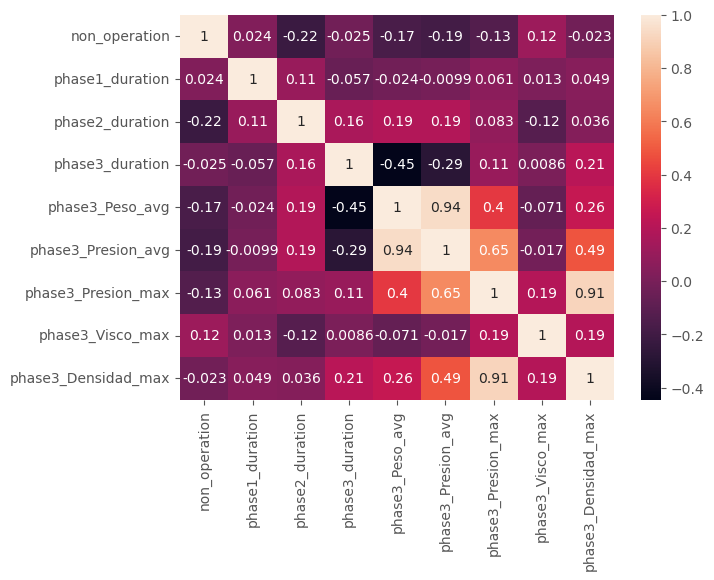

In [101]:
#Plotting the correlation of the char_name
corr_df = merge.corr(method="pearson")

plt.figure(figsize=(7, 5))
sns.heatmap(corr_df, annot=True)
plt.show()

### Since the non-operational phase, phase 1, and phase 2 have correlations very close to zero, I've decided to cut these features.

In [102]:
m = merge.drop(columns={'non_operation', 'phase1_duration', 'phase2_duration'})

### Plotting histograms for all the features

array([[<Axes: title={'center': 'phase3_duration'}>,
        <Axes: title={'center': 'phase3_Peso_avg'}>],
       [<Axes: title={'center': 'phase3_Presion_avg'}>,
        <Axes: title={'center': 'phase3_Presion_max'}>],
       [<Axes: title={'center': 'phase3_Visco_max'}>,
        <Axes: title={'center': 'phase3_Densidad_max'}>]], dtype=object)

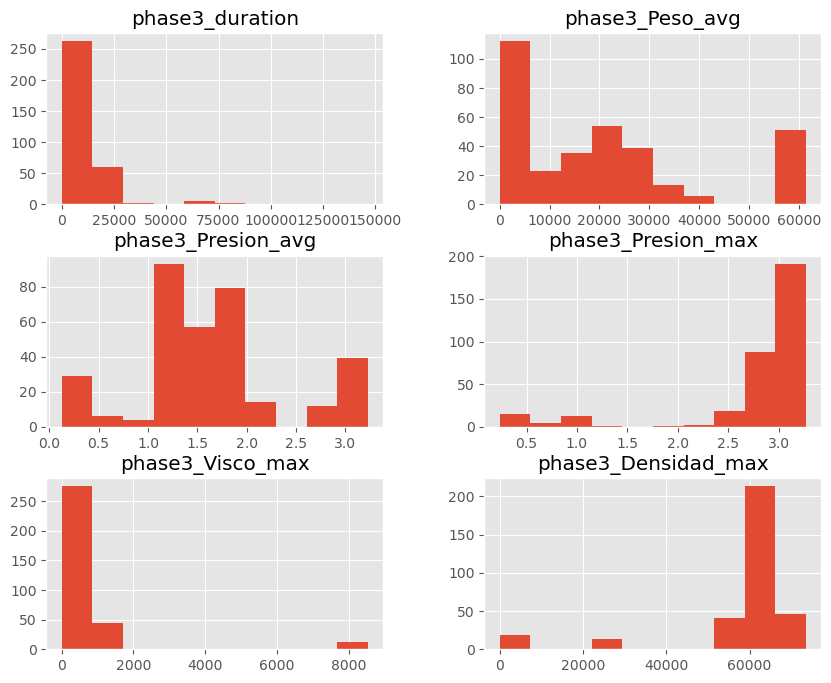

In [103]:
m.hist(figsize=(10,8))

### Plotting Boxplot for all the features to anal

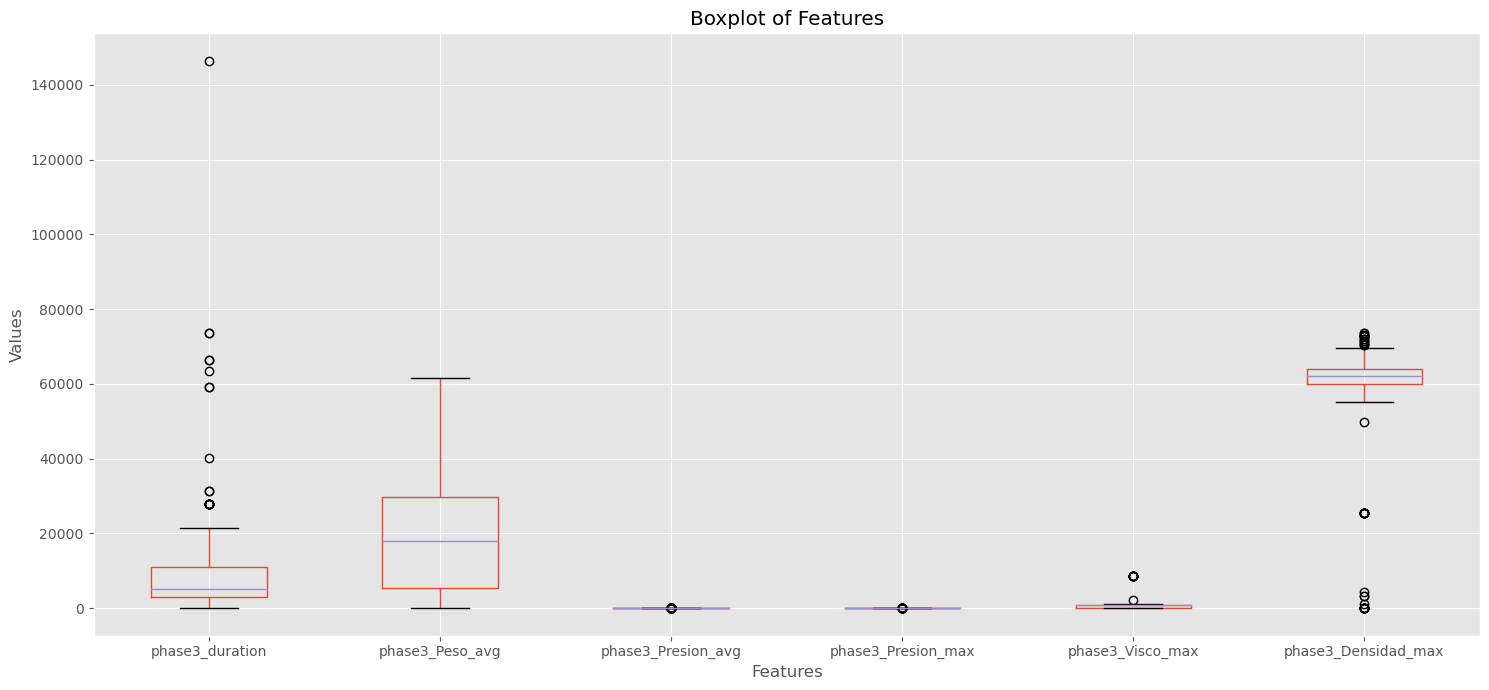

In [104]:
# merge.boxplot(figsize=(18,10))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 7))

# Assuming 'df' contains only numerical columns
m.boxplot(ax=ax)

# Set title and labels
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

### Plotting scatter points for all the features 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


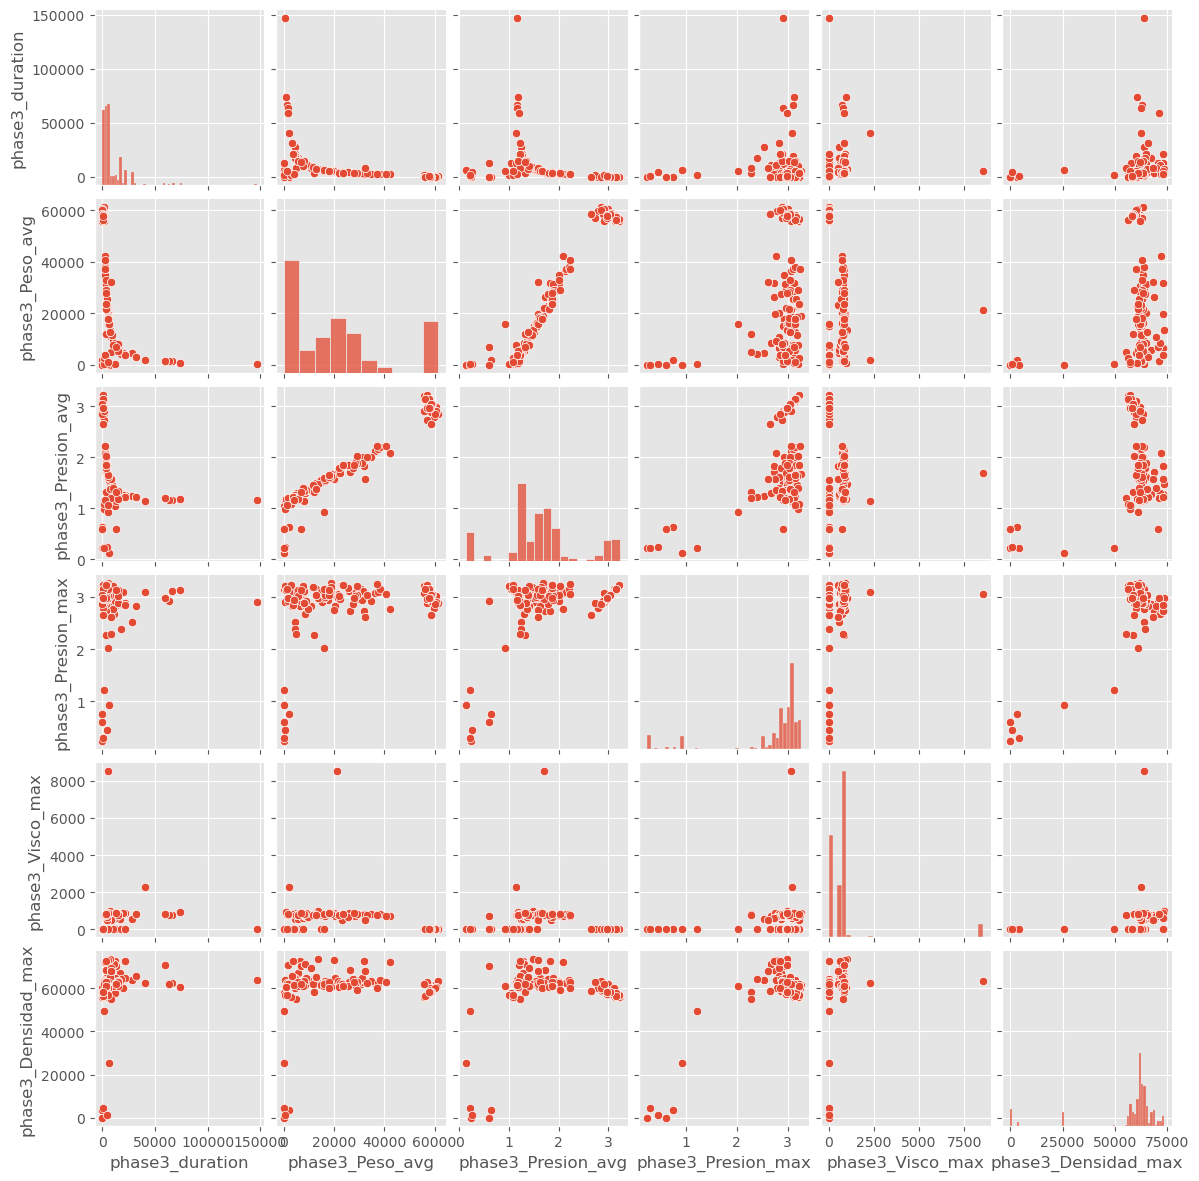

In [105]:
sns.pairplot(data = m, height = 2)

## Remove Outliers

### Define a function called "outliers" wich returns a list of index of outliers. 
### IQR = Q3 - Q1 
### +/- 1.5 * IQR

In [106]:
# #Creating the function that will take the outliers
# def outliers(df, ft):
#     Q1 = df[ft].quantile(0.20)
#     Q3 = df[ft].quantile(0.80)
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
#     return ls

### Create an empty list to store the output indices from multiple columns

In [107]:
# #Creating a list that will receive the list of index rows of outliers
# index_list = []

# for feature in ['phase_3.Recirculacion.duration', 'phase_3.Recirculacion.Peso_avg', 'phase_3.Recirculacion.Densidad_max',
#                  'phase_3.Recirculacion.Presion_avg', 'phase_3.Recirculacion.Presion_max', 'phase_3.Recirculacion.Visco_max']:
#     index_list.extend(outliers(merge, feature))

# # index_list

### Define a function called 'remove' wich returns a cleaned DataFrame without outliers

In [108]:
# #Creating the function that will remove the outliers of entire DataFrame by index 
# def remove(df, ls):
#     ls = sorted(set(ls))
#     df = df.drop(ls)
#     df = df.reset_index(drop=True)
#     return df

### Applying the function that will remove outliers from the entire DataFrame and checking the results.

In [109]:
# m = remove(merge, index_list)

### After removing the outliers and subsequently running the model, the difference in R-squared is drastic, turning negative. Upon researching and analyzing, it's possible to infer that the outliers should not have been removed as they constitute a crucial part of the data. Since the data represents different batches in a production, it's plausible to suggest that various types of products within the fabric conditioner can directly impact weight, density, pressure, and viscosity. Therefore, it was decided to retain the outliers to keep the model more faithful to the real world scenarios.

## 4. Saving the dataframe processed to use in the machine learning model 

In [110]:
m.to_csv('data_processed.csv', index=False)